In [1]:
# Task 3: Decision Tree Classifier on Bank Marketing Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# ----------------- Load Dataset -----------------
df = pd.read_csv("/content/drive/MyDrive/bank-full.csv", sep=';')
print("Dataset Shape:", df.shape)
print(df.info())
print(df['y'].value_counts())

Dataset Shape: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
y
no     39922
yes     5289
Name: count, dtype: int64


/tmp/ipython-input-1487231360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette="Set2")


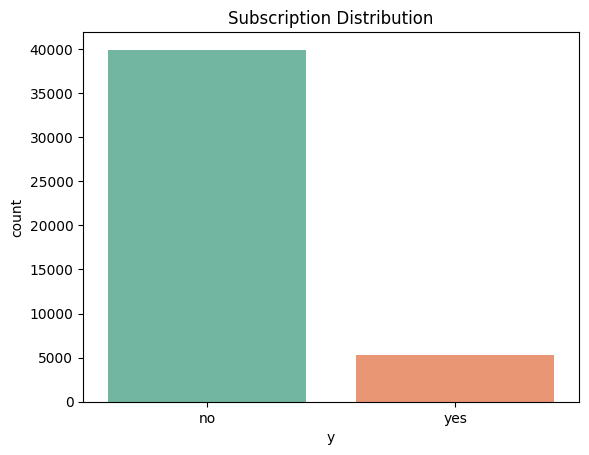

In [3]:
# ----------------- Visualization -----------------
sns.countplot(data=df, x='y', palette="Set2")
plt.title("Subscription Distribution")
plt.show()

In [4]:
# ----------------- Encode Categorical Variables -----------------
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [5]:
# Features and target
X = df.drop('y', axis=1)
y = df['y']

In [6]:
# ----------------- Train-Test Split -----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# ----------------- Decision Tree Model -----------------
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [8]:
# Predictions
y_pred = model.predict(X_test)

In [9]:
# ----------------- Evaluation -----------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8893066460245493

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.56      0.26      0.35      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043


Confusion Matrix:
 [[7770  215]
 [ 786  272]]


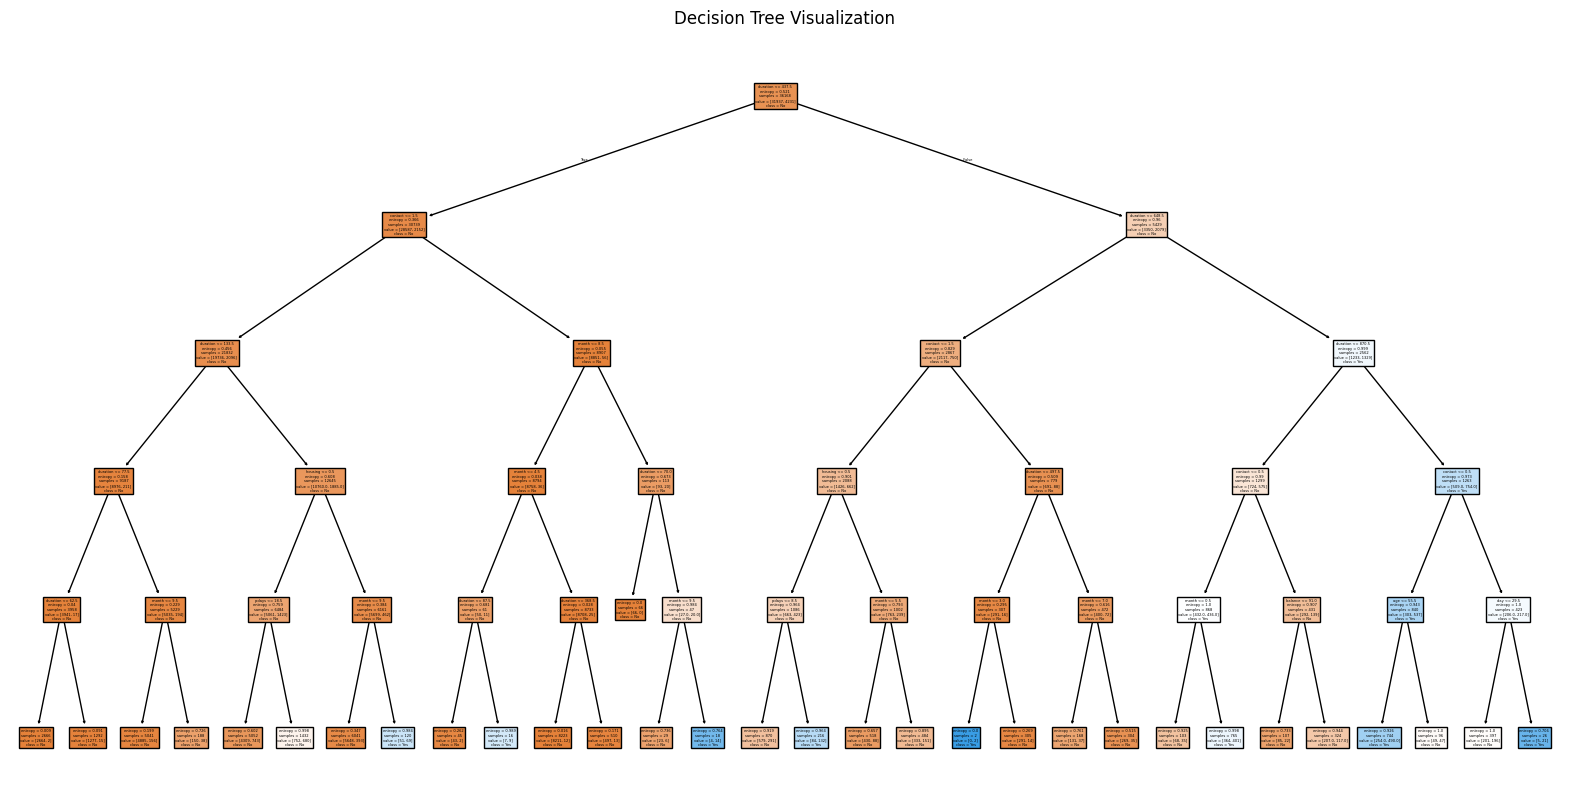

In [10]:
# ----------------- Visualization -----------------
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()